In [55]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [56]:
df_Gala = pd.read_csv("../../../DataSet/Gala/gala.csv")
df_Gala.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    169 non-null    object
 1   Gala    169 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [57]:
df_Gala

,Date,Gala
0,04/01/2015,2752
1,11/01/2015,3322
2,18/01/2015,2257
3,25/01/2015,2061
4,01/02/2015,2905
...,...,...
164,25/02/2018,11798
165,04/03/2018,10102
166,11/03/2018,12281
167,18/03/2018,7738


In [58]:
df_Gala["Date"] = pd.to_datetime(df_Gala["Date"], format="%d/%m/%Y")
df_Gala.sort_values(by="Date", inplace=True)
df_Gala

,Date,Gala
0,2015-01-04,2752
1,2015-01-11,3322
2,2015-01-18,2257
3,2015-01-25,2061
4,2015-02-01,2905
...,...,...
164,2018-02-25,11798
165,2018-03-04,10102
166,2018-03-11,12281
167,2018-03-18,7738


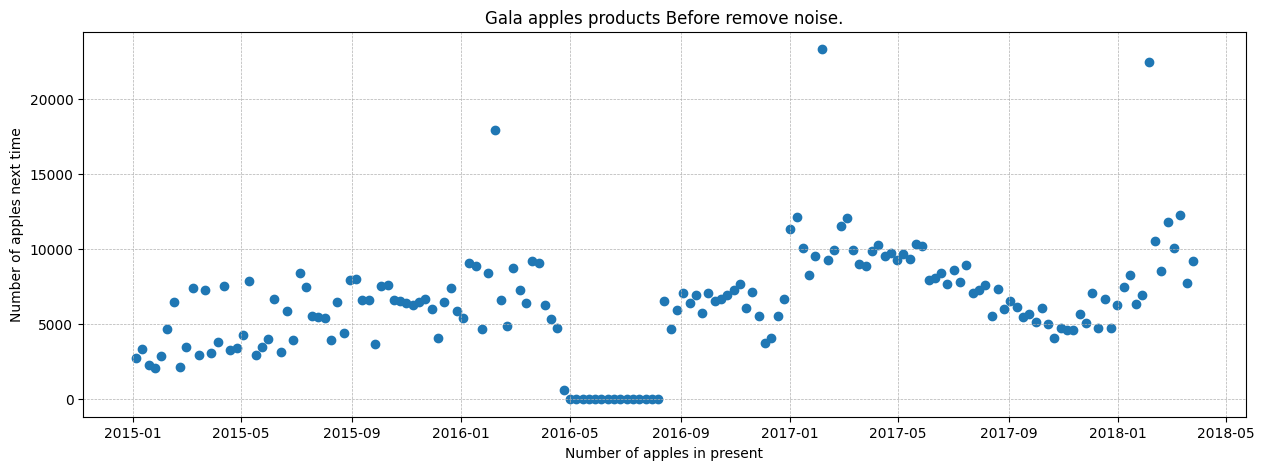

In [59]:
plt.figure(figsize=(15,5))
plt.title("Gala apples products Before remove noise.")
plt.scatter(df_Gala["Date"], df_Gala["Gala"])
plt.xlabel("Number of apples in present")
plt.ylabel("Number of apples next time")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

PrePocessing Noise

In [60]:
df_Gala = df_Gala[df_Gala["Gala"] <= 14000]
df_Gala = df_Gala[df_Gala["Gala"] > 1000]

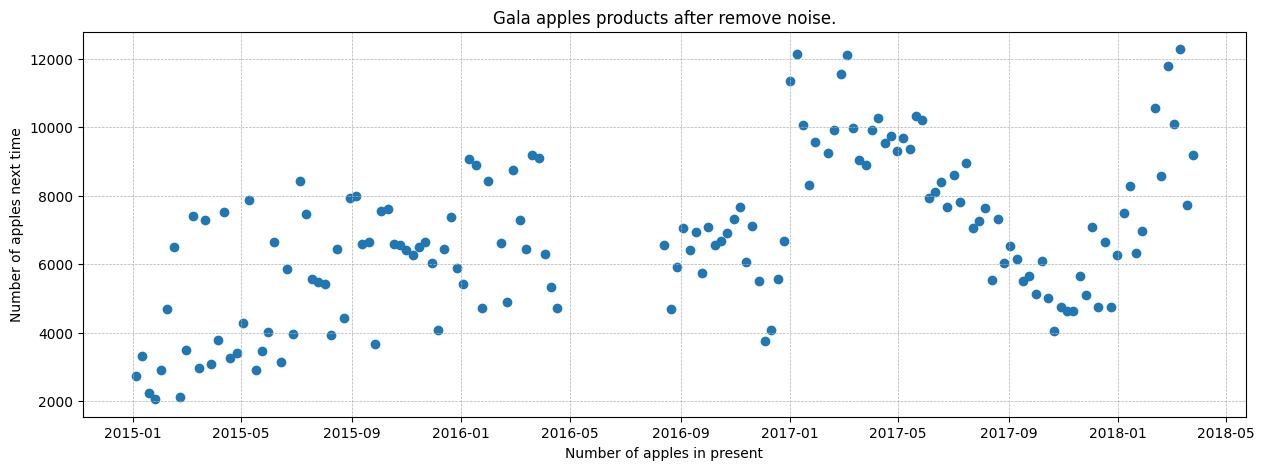

In [61]:
plt.figure(figsize=(15,5))
plt.title("Gala apples products after remove noise.")
plt.scatter(df_Gala["Date"], df_Gala["Gala"])
plt.xlabel("Number of apples in present")
plt.ylabel("Number of apples next time")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

In [62]:
def writeEvaluate(model, mae:np.float64, mse:np.float64, r2:np.float64, mape:np.float64, filename):
    df = pd.read_csv(filename)
    row_index = df.index.get_loc(df.loc[df['Model'] == model].index[0])
    df.at[row_index,'Mae'] = mae
    df.at[row_index,'Mse'] = mse
    df.at[row_index,'R2'] = r2
    df.at[row_index,'Mape'] = mape

    df.to_csv(filename,encoding='utf-8', sep=',', index=False)

In [63]:
def findBestRandomState(r,t, x, y):
    random = 0
    a = 1000000

    for _ in range(r,t):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=_)
        buffer = []

        for row in x_test[:,1:]:
            buffer.append(np.mean(row))

        if (buff := mean_absolute_error(y_test[:, 1:], buffer)) < a:
            a = buff
            random = _
    print(a, random)

Function Create X Sequence to Prdict 1

In [64]:
def createSequenceToOneDataSet(r, data:pd.DataFrame):  # Create Sequence DataSet
    df = data.copy()
    i = 1
    
    while i < r:
        df[f'x{i}'] = df['Gala'].shift(-i)
        i += 1

    if i == r:
        df['y'] = df['Gala'].shift(-i)

    df = df.dropna(axis=0)
    return df

DataSet for Predict y by Use Sequence X

In [65]:
df = createSequenceToOneDataSet(5, df_Gala)
df

,Date,Gala,x1,x2,x3,x4,y
0,2015-01-04,2752,3322.0,2257.0,2061.0,2905.0,4699.0
1,2015-01-11,3322,2257.0,2061.0,2905.0,4699.0,6493.0
2,2015-01-18,2257,2061.0,2905.0,4699.0,6493.0,2122.0
3,2015-01-25,2061,2905.0,4699.0,6493.0,2122.0,3492.0
4,2015-02-01,2905,4699.0,6493.0,2122.0,3492.0,7404.0
...,...,...,...,...,...,...,...
158,2018-01-14,8299,6343.0,6962.0,10559.0,8576.0,11798.0
159,2018-01-21,6343,6962.0,10559.0,8576.0,11798.0,10102.0
160,2018-01-28,6962,10559.0,8576.0,11798.0,10102.0,12281.0
162,2018-02-11,10559,8576.0,11798.0,10102.0,12281.0,7738.0


In [66]:
x = np.array(df.drop(columns='y'))
y = np.array(df.drop(['Gala','x1','x2','x3','x4'],axis=1))

# scaler = StandardScaler()
# scaler.fit(x)
# x = scaler.transform(x)
# scaler.fit(y.reshape(-1,1))
# y = scaler.transform(y.reshape(-1,1))


Find best randomState for train_test_split

In [67]:
# findBestRandomState(1,1000000,x, y)
# seed 67515 MAE: 545.4068965517241     14000 1000
# seed 774380 MAE: 660.2108108108109    14000 1000
# seed 503026 MAE: 612.1028571428571    14000 1000

Train test split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=67515)

x_train = np.array(sorted(x_train, key=lambda x: x[0]))
x_test = np.array(sorted(x_test, key=lambda x: x[0]))
y_train = np.array(sorted(y_train, key=lambda x: x[0]))
y_test = np.array(sorted(y_test, key=lambda x: x[0]))

Baseline Predict

In [69]:
baseline_predict = []

for row in x_test[:,1:]:
    baseline_predict.append(np.mean(row))

In [70]:
mae = mean_absolute_error(y_test[:, 1:], baseline_predict)
mse = mean_squared_error(y_test[:, 1:], baseline_predict)
r2 = r2_score(y_test[:, 1:], baseline_predict)
mape = mean_absolute_percentage_error(y_test[:, 1:], baseline_predict)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Square Error: {mse}")
print(f"R2 score: {r2}")
print(f"Mean Absolute Percentage Error: {mape}")

writeEvaluate("Baseline",mae,mse,r2,mape,"evaluate.csv")


Mean Absolute Error: 545.4068965517241
Mean Square Error: 546911.7903448277
R2 score: 0.8274107662444903
Mean Absolute Percentage Error: 0.09795929628652426


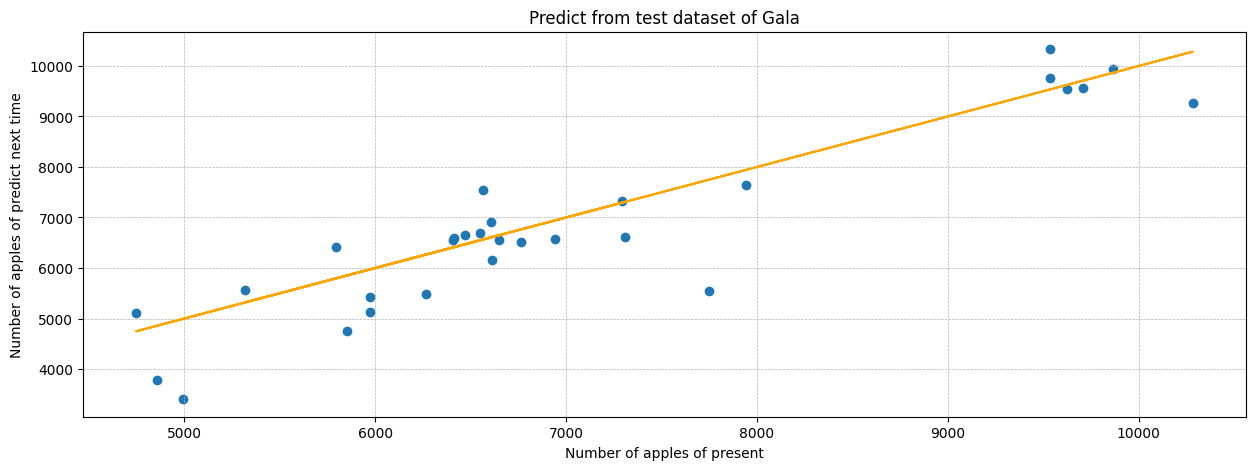

In [71]:
plt.figure(figsize=(15,5))
plt.scatter(baseline_predict, y_test[:, 1:])
plt.plot(baseline_predict, baseline_predict, color="orange")
plt.xlabel("Number of apples of present")
plt.ylabel("Number of apples of predict next time")
plt.title("Predict from test dataset of Gala")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

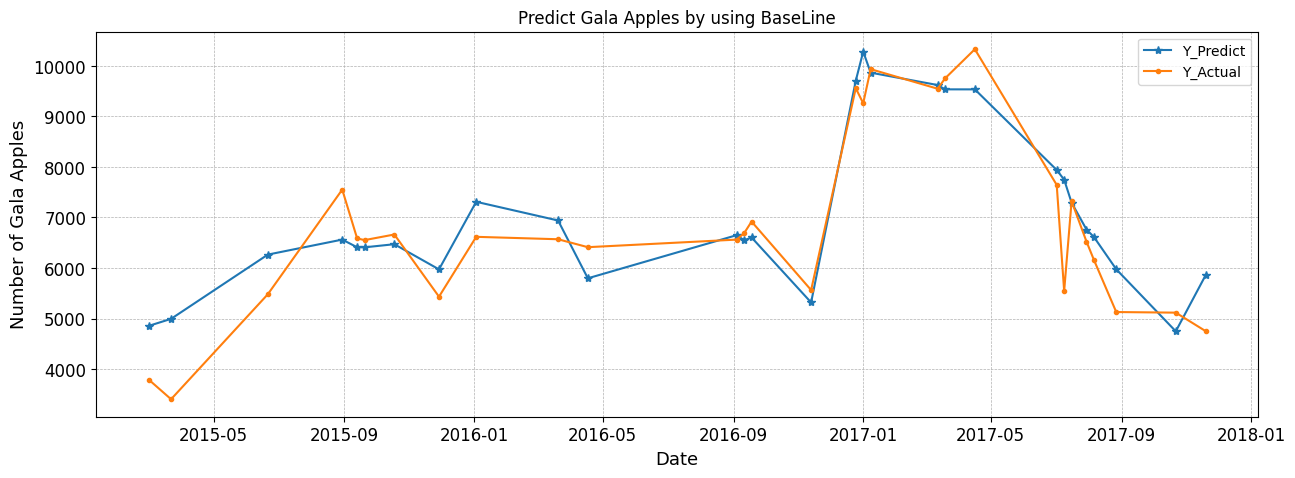

In [72]:
plt.figure(figsize=(15, 5))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Date", fontsize=13)
plt.ylabel("Number of Gala Apples", fontsize=13)

plt.plot(x_test[:, :1], baseline_predict, label="Y_Predict", marker='*')
plt.plot(x_test[:,:1], y_test[:, 1:], label="Y_Actual", marker='.')


plt.title("Predict Gala Apples by using BaseLine")
plt.legend()
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()